# IMDB 5000 Movie Dataset Clustering

===========================================================================================================

**AUTHOR**: Mengshan Jin

**CREATION DATE**: 08/02/2017

===========================================================================================================

**PROGRAM DESCRIPTION**: Clustering on the movies

**INPUT DATASETS**: 01_Data/Outputs/imdb_modern_cleaned.csv

**OUTPUT DATASETS**: 


===========================================================================================================

**PROGRAM CHANGE HISTORY**

Date|Author|Change|
----|------|------|

# Section 0: Import packages

In [46]:
# Data structure
import numpy as np
import pandas as pd
np.random.seed(7)
# pd.options.mode.chained_assignment = None  # default='warn'

# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# utilities
import copy

# sklearn
from sklearn.cluster import AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, KMeans

# Section 1: Read data

In [2]:
imdb_modern_cleaned = pd.read_csv("../../01_Data/Outputs/imdb_modern_cleaned.csv", index_col=0)

In [3]:
imdb_modern_cleaned.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Spectre,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
John Carter,462.0,132.0,475.0,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
imdb_modern_cleaned.shape

(4301, 255)

In [4]:
imdb_modern_cleaned.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'keyword_love',
 'keyword_friend',
 'keyword_murder',
 'keyword_death',
 'keyword_police',
 'keyword_new york city',
 'keyword_high school',
 'keyword_alien',
 'keyword_fbi',
 'keyword_boy',
 'keyword_school',
 'keyword_drugs',
 'keyword_revenge',
 'keyword_friendship',
 'keyword_prison',
 'keyword_marriage',
 'keyword_dog',
 'keyword_party',
 'keyword_sex',
 'keyword_island',
 'keyword_bo

# Section 2: Clustering

Algorithms to choose from:
1. Affinity propagation
2. Mean-shift
3. Ward hierarchical clustering
4. Aggolomerative clustering
5. DBSCAN

## Step 1: Split the dataset into training and out-of-time sample testing datasets

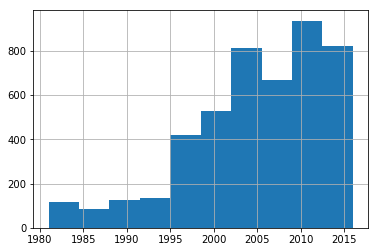

In [7]:
imdb_modern_cleaned['title_year'].hist()

In [8]:
imdb_modern_cleaned['title_year'].describe()

count    4650.000000
mean     2004.766452
std         7.869203
min      1981.000000
25%      2000.000000
50%      2006.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

In [10]:
imdb_modern_cleaned.loc[imdb_modern_cleaned['title_year']==2016].shape # 106 movies in 2016

(106, 280)

In [11]:
imdb_modern_cleaned.loc[imdb_modern_cleaned['title_year']==2015].shape # 226 movies in 2015

(226, 280)

In [5]:
imdb_train = imdb_modern_cleaned.loc[imdb_modern_cleaned['title_year'] < 2015]
imdb_test = imdb_modern_cleaned.loc[imdb_modern_cleaned['title_year'] >= 2015]

In [6]:
imdb_train.shape

(4000, 255)

In [7]:
imdb_test.shape

(301, 255)

## Step 2: Cross validation on training dataset 
Then I can choose the best clustering algorithm to build a prediction algorithm(multi-class classification problem) on top of it

### Part 1: Test Affinity Propagation

In [24]:
clust1 = AffinityPropagation(damping=0.5).fit(imdb_train)

In [26]:
pd.Series(clust1.labels_).value_counts()[:20]

196     77
166     60
147     53
133     53
667     52
273     49
329     48
716     47
70      47
69      44
181     34
58      34
462     31
85      31
354     31
104     30
1740    29
376     28
52      28
193     28
dtype: int64

### Part 2: Test Mean Shift

In [27]:
clust2 = MeanShift(cluster_all=False, n_jobs=-2).fit(imdb_train)

In [28]:
pd.Series(clust2.labels_).value_counts()

 0     2751
-1     1119
 1       59
 2       18
 3       13
 4       10
 7        5
 6        5
 5        4
 8        4
 9        3
 10       2
 13       1
 16       1
 12       1
 14       1
 11       1
 15       1
 17       1
dtype: int64

### Part 3: Test Hierarchical Clustering

In [8]:
clust3 = AgglomerativeClustering(n_clusters=8).fit(imdb_train)

In [9]:
pd.Series(clust3.labels_).value_counts()

3    1884
1     991
2     609
0     232
4     158
5      63
6      59
7       4
dtype: int64

In [10]:
tmp = pd.concat([imdb_train[['imdb_score', 'gross']].reset_index(drop=True), pd.Series(clust3.labels_, name="cluster_num")], axis=1)

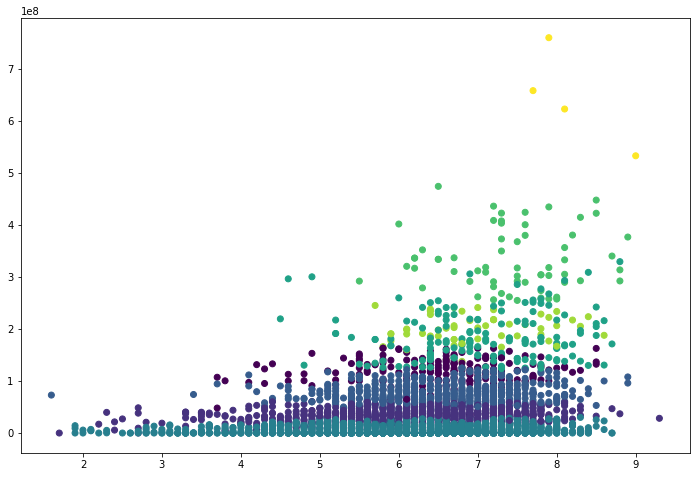

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(x=tmp['imdb_score'], y=tmp['gross'], c=tmp['cluster_num'])

In [12]:
imdb_agglo = copy.deepcopy(imdb_train)
imdb_agglo['labels'] = clust3.labels_

In [13]:
imdb_agglo.loc[imdb_agglo['labels']==7]
# Some extremely popular movies have been captured

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X,labels
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
The Avengers,703.0,173.0,0.0,19000.0,26000.0,623279547.0,995415.0,87697.0,3.0,1722.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
Titanic,315.0,194.0,0.0,794.0,29000.0,658672302.0,793059.0,45223.0,0.0,2528.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
The Dark Knight,645.0,152.0,22000.0,11000.0,23000.0,533316061.0,1676169.0,57802.0,0.0,4667.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [20]:
# Is Inception in this dataset?
[m for m in imdb_modern_cleaned.index.tolist() if "Inception" in m]

['Inception\xc2\xa0']

In [23]:
imdb_agglo.loc[imdb_agglo['labels'] == imdb_agglo.loc['Inception\xc2\xa0']['labels']]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X,labels
movie_title,,,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: At World's End,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Spider-Man 3,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056.0,46055.0,0.0,1902.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Harry Potter and the Half-Blood Prince,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795.0,58753.0,3.0,973.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Pirates of the Caribbean: Dead Man's Chest,313.0,151.0,563.0,1000.0,40000.0,423032628.0,522040.0,48486.0,2.0,1832.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Man of Steel,733.0,143.0,0.0,748.0,15000.0,291021565.0,548573.0,20495.0,0.0,2536.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Pirates of the Caribbean: On Stranger Tides,448.0,136.0,252.0,1000.0,40000.0,241063875.0,370704.0,54083.0,4.0,484.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
The Hobbit: The Battle of the Five Armies,422.0,164.0,0.0,773.0,5000.0,255108370.0,354228.0,9152.0,0.0,802.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
The Amazing Spider-Man,599.0,153.0,464.0,963.0,15000.0,262030663.0,451803.0,28489.0,0.0,1225.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [24]:
# Is Coherence in this dataset?
[m for m in imdb_modern_cleaned.index.tolist() if "Coherence" in m]
# Nope

[]

In [25]:
# Is The Matrix in this dataset?
[m for m in imdb_modern_cleaned.index.tolist() if "Matrix" in m]
# They are in different clusters: 0, 4, 5

['The Matrix Revolutions\xc2\xa0',
 'The Matrix Reloaded\xc2\xa0',
 'The Matrix\xc2\xa0']

In [29]:
imdb_agglo.loc['The Matrix\xc2\xa0']['labels']

4.0

In [30]:
imdb_agglo.loc[imdb_agglo['labels'] == imdb_agglo.loc['The Matrix\xc2\xa0']['labels']]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X,labels
movie_title,,,,,,,,,,,,,,,,,,,,,
The Fast and the Furious,187.0,106.0,357.0,4000.0,23000.0,144512310.0,272223.0,45327.0,2.0,988.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
The Bourne Ultimatum,329.0,115.0,521.0,883.0,13000.0,227137090.0,491077.0,17369.0,0.0,820.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Kung Fu Panda,266.0,92.0,54.0,562.0,11000.0,215395021.0,307029.0,12754.0,0.0,360.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
War of the Worlds,401.0,116.0,14000.0,807.0,10000.0,234277056.0,334345.0,12758.0,0.0,2741.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Harry Potter and the Prisoner of Azkaban,274.0,142.0,0.0,10000.0,11000.0,249358727.0,382255.0,33284.0,3.0,1504.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
The Da Vinci Code,294.0,174.0,2000.0,362.0,15000.0,217536138.0,314253.0,16008.0,2.0,1966.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
X-Men 2,289.0,134.0,0.0,346.0,20000.0,214948780.0,405973.0,20952.0,4.0,1055.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Fast Five,342.0,132.0,681.0,12000.0,23000.0,209805005.0,284792.0,55345.0,3.0,366.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
How the Grinch Stole Christmas,175.0,110.0,2000.0,636.0,1000.0,260031035.0,141414.0,4146.0,0.0,482.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [31]:
# Is Memento in this dataset?
[m for m in imdb_modern_cleaned.index.tolist() if "Memento" in m]

['Memento\xc2\xa0']

In [32]:
imdb_agglo.loc['Memento\xc2\xa0']['labels']

3.0

In [33]:
imdb_agglo.loc[imdb_agglo['labels'] == imdb_agglo.loc['Memento\xc2\xa0']['labels']]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X,labels
movie_title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Deathly Hallows: Part II,1.0,0.0,0.0,159.0,10000.0,0.0,381.0,11036.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
Harry Potter and the Deathly Hallows: Part I,4.0,0.0,0.0,1000.0,10000.0,0.0,252.0,14719.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
The Spanish Prisoner,97.0,110.0,342.0,393.0,623.0,10200000.0,18697.0,1722.0,0.0,263.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
Dredd,432.0,95.0,38.0,20.0,409.0,13401683.0,203458.0,578.0,0.0,588.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
Creepshow,127.0,130.0,0.0,602.0,875.0,0.0,29932.0,2662.0,0.0,211.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
Déjà Vu,19.0,117.0,69.0,87.0,898.0,821997.0,666.0,1753.0,0.0,40.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
The Edge,95.0,117.0,93.0,904.0,12000.0,27779888.0,55913.0,14831.0,2.0,182.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
Carriers,130.0,84.0,10.0,394.0,3000.0,90820.0,35510.0,4368.0,0.0,119.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
The Last Legion,90.0,102.0,4.0,112.0,14000.0,5932060.0,29285.0,14625.0,0.0,174.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


### ==>Question<==
The Harry Potter Series are in different clusters, why?

### Part 4: Test DBSCAN

In [44]:
clust4 = DBSCAN(eps=5e5, min_samples=10, n_jobs=-1).fit(imdb_train)

In [45]:
pd.Series(clust4.labels_).value_counts()

-1     3148
 0      657
 10      39
 1       37
 11      19
 7       19
 3       16
 9       12
 6       11
 4       11
 2       11
 5       10
 8       10
dtype: int64

### ==>Question<==
It looks like DBSCAN didn't work, why???

### ==>Answer<==
It was because the eps was way too small so that none of the movies are close to each other.

### Part 5: Test K-Means
I know this method is not in the plan, but let's see what would happen after I deleted non-English movies.

In [47]:
clust5 = KMeans(n_clusters=8, n_jobs=-1).fit(imdb_train)

In [48]:
pd.Series(clust5.labels_).value_counts()

0    1792
7    1015
3     450
6     304
5     199
1     115
2     101
4      24
dtype: int64

In [49]:
tmp = pd.concat([imdb_train[['imdb_score', 'gross']].reset_index(drop=True), pd.Series(clust5.labels_, name="cluster_num")], axis=1)

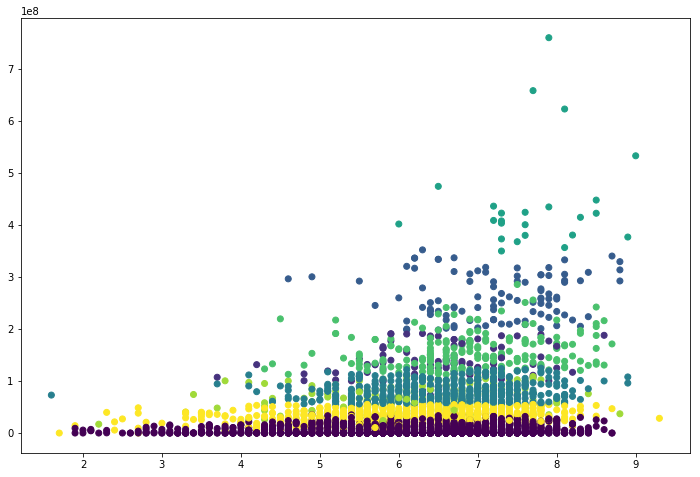

In [51]:
plt.figure(figsize=(12, 8))
plt.scatter(x=tmp['imdb_score'], y=tmp['gross'], c=tmp['cluster_num'])
# Visually it looks worse than Hierarchical Clustering

In [52]:
imdb_kmeans = copy.deepcopy(imdb_train)
imdb_kmeans['labels'] = clust5.labels_

In [54]:
imdb_kmeans.loc[imdb_kmeans['labels'] == 4]
# But this actually makes sense -- most popular movies are almost all here...

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X,labels
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
The Dark Knight Rises,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Pirates of the Caribbean: Dead Man's Chest,313.0,151.0,563.0,1000.0,40000.0,423032628.0,522040.0,48486.0,2.0,1832.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
The Avengers,703.0,173.0,0.0,19000.0,26000.0,623279547.0,995415.0,87697.0,3.0,1722.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Titanic,315.0,194.0,0.0,794.0,29000.0,658672302.0,793059.0,45223.0,0.0,2528.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Spider-Man 2,300.0,135.0,0.0,4000.0,24000.0,373377893.0,411164.0,43388.0,1.0,1303.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Iron Man 3,608.0,195.0,1000.0,3000.0,21000.0,408992272.0,557489.0,30426.0,3.0,1187.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Transformers: Revenge of the Fallen,366.0,150.0,0.0,464.0,894.0,402076689.0,323207.0,3218.0,0.0,1439.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Toy Story 3,453.0,103.0,125.0,721.0,15000.0,414984497.0,544884.0,19085.0,3.0,733.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
